<a href="https://colab.research.google.com/github/TonyYuanMD/OCR-summer-research-2022/blob/EasyOCR/PaddleAndEasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import easyocr
from google.colab import files
from IPython.display import Image
import pandas as pd
import os

In [2]:
!pip install easyocr
!pip install paddleocr
!pip install paddlepaddle
!pip install shapely


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 16 kB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 334 kB 16.8 MB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 2.8 MB 48.1 MB/s 
     |████████████████████████████████| 948 kB 54.5 MB/s 
     |████████████████████████████████| 55.7 MB 1.2 MB/s 
     |████████████████████████████████| 604 kB 61.0 MB/s 
     |████████████████████████████████| 404 kB 59.4 MB/s 
     |████████████████████████████████| 204 kB 73.1 MB/s 
     |████████████████████████████████| 2.3 MB 48.2 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149852 sha256=bdd6352fa7b5d38882d4ce0ae0e0987e340d0ac7915d6

Saving Paralell.jpg to Paralell.jpg


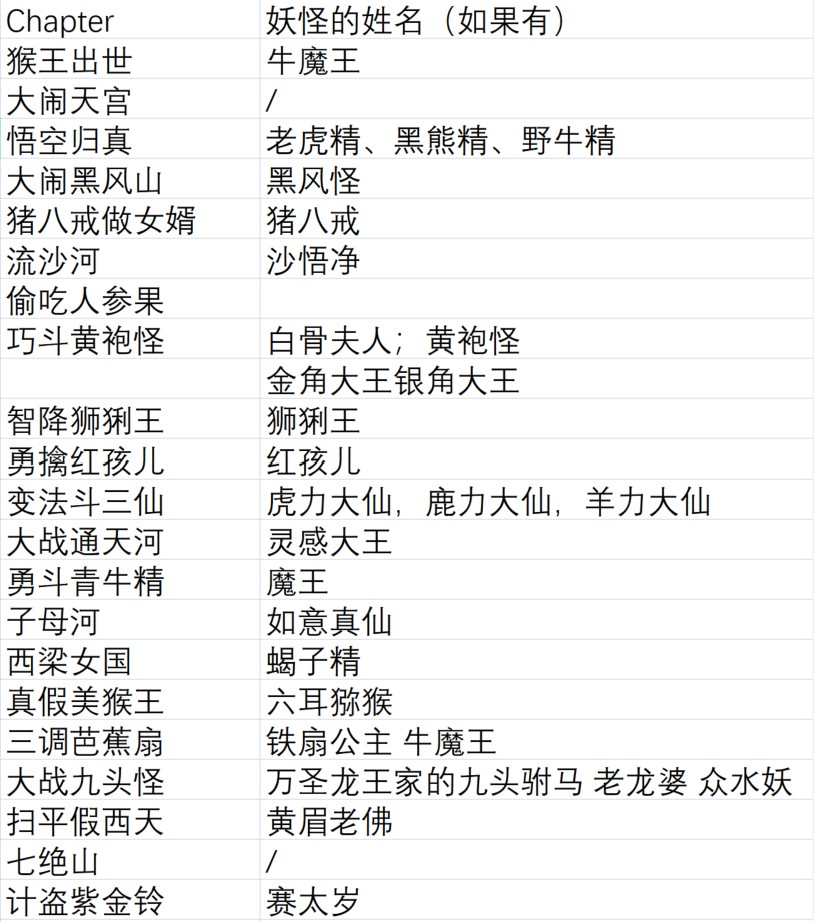

In [ ]:
uploaded = files.upload()
Image('Paralell.jpg')

In [49]:
#os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"
reader=easyocr.Reader(['ch_sim','en'])
result=reader.readtext('/content/drive/MyDrive/Colab Notebooks/IMG_1.jpg')
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[769, 1], [2236, 1], [2236, 162], [769, 162]],
  '中围农业银行银行卡 /活期存折交易明细潸单',
  0.13727882582381443),
 ([[2080, 119], [2699, 119], [2699, 314], [2080, 314]],
  '^N]I母宵』',
  1.8022718826769032e-08),
 ([[2147, 265], [2390, 265], [2390, 337], [2147, 337]],
  '标~;  观钞',
  0.036715971918252634),
 ([[2670, 241], [2733, 241], [2733, 308], [2670, 308]],
  'F',
  0.009719657842721718),
 ([[266, 308], [1022, 308], [1022, 395], [266, 395]],
  "账片户名' 8213380369900032171  K困",
  0.030360258859098484),
 ([[1154, 307], [1367, 307], [1367, 367], [1154, 367]],
  '序廿; 000',
  0.15596694546701143),
 ([[1606, 279], [1889, 279], [1889, 356], [1606, 356]],
  "币种' ^尽币",
  0.5543316968373274),
 ([[2275, 333], [2542, 333], [2542, 424], [2275, 424]],
  '辽11县支行',
  0.21791147884336484),
 ([[268, 425], [875, 425], [875, 500], [268, 500]],
  '彪止1奶; 20200514-20200814',
  0.11122170174590226),
 ([[2289, 405], [2532, 405], [2532, 482], [2289, 482]],
  '业子专朋苹',
  0.02587195846004363),
 ([[1458, 522], [1654, 522], [1654

In [50]:
def y_axis(l):
  return l[0][0][1]
result.sort(key=y_axis)

In [51]:
coordinates=[x[0] for x in result]
coordinates_int10=np.round(np.divide(coordinates,10))
numberofrows=len(result)

columns=[]
numofparalines=0

for i in range(numberofrows):
    if i==0:
        columns.append([result[i][1]])
    # elif abs(coordinates[i][0][1]-coordinates[i-1][0][1])<=20:
    elif coordinates_int10[i][0][1]==coordinates_int10[i-1][0][1]:
      numofparalines+=1
      if coordinates[i][0][0]>coordinates[i-1][0][0]:
          columns[i-numofparalines].append(result[i][1])
    else:
        columns.append([result[i][1]])

df=pd.DataFrame(columns)
# df.fillna('',inplace=True)
df.to_excel('/content/drive/MyDrive/Colab Notebooks/result.xlsx',index=False)